Primeras filas del dataset completo:
   record     mean_rr      std_rr   skew_rr   kurt_rr label
0  A00001  761.666667   33.172859  0.136889 -1.198454     N
1  A00002  878.383838  236.231812 -1.329061  0.178571     N
2  A00003  745.147679   48.492891  0.059616 -0.307410     N
3  A00004  947.111111  178.938709  0.482376 -0.937584     A
4  A00005  538.287462  220.019281  1.217656  0.148889     A

Descripción estadística general:
           mean_rr       std_rr      skew_rr      kurt_rr
count  5774.000000  5774.000000  5774.000000  5774.000000
mean    832.295064   100.762513    -0.131268     3.246076
std     151.121952   114.295702     1.736381     6.786592
min     369.829060     2.352148    -8.644226    -1.973079
25%     737.618708    29.076101    -0.876240    -0.567530
50%     829.428571    65.452709    -0.045443     0.375342
75%     921.598566   140.071018     0.598299     4.162087
max    2285.555556  2023.482677     8.174018    74.494796

Distribución de clases:
label
N    5037
A     

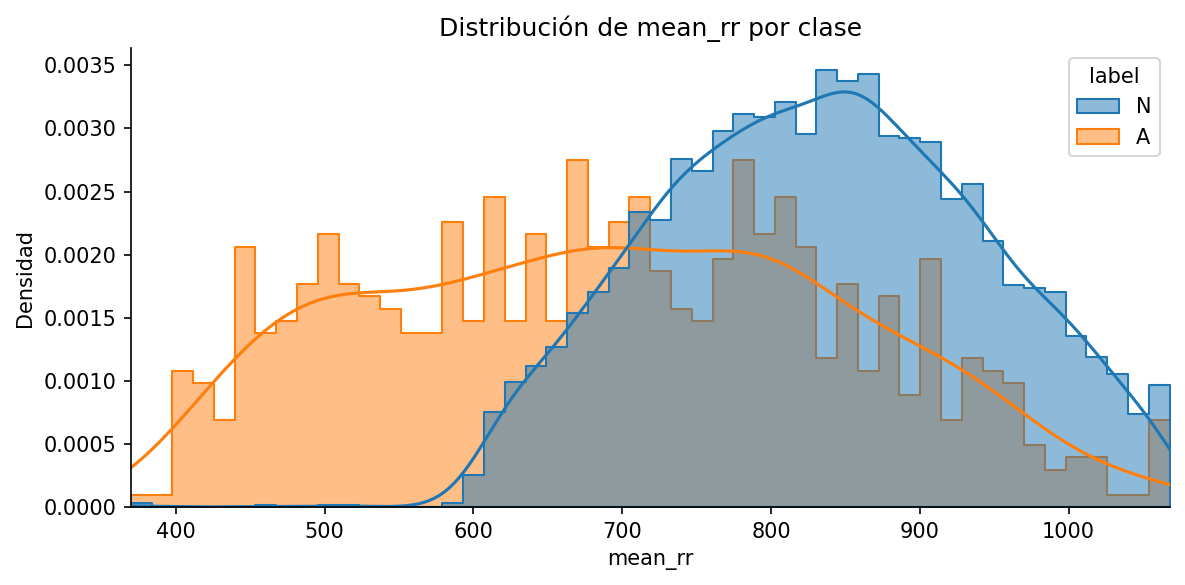

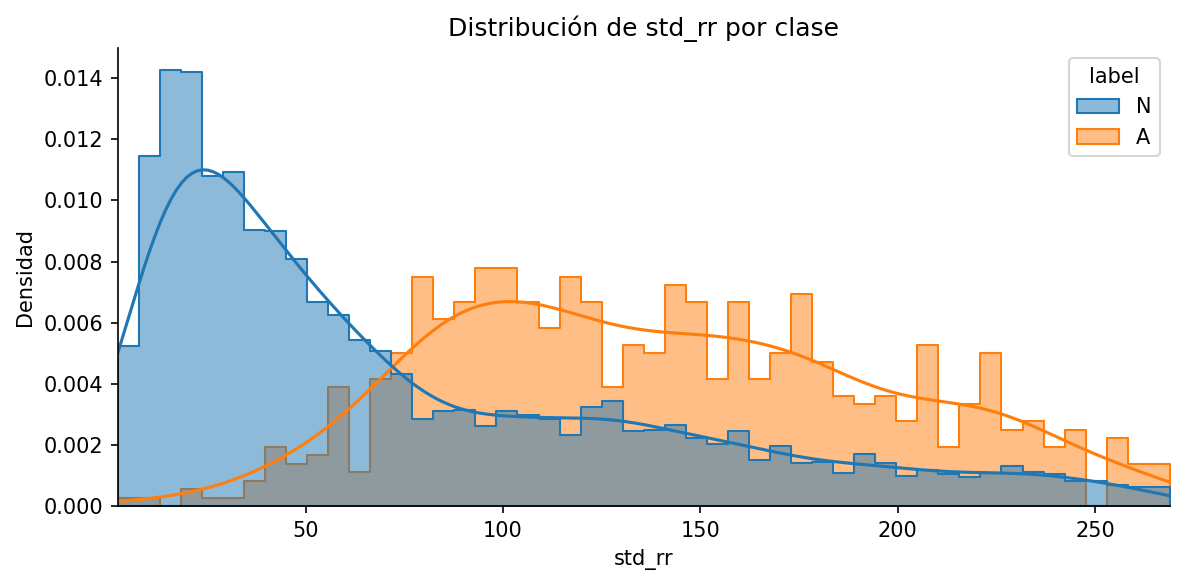

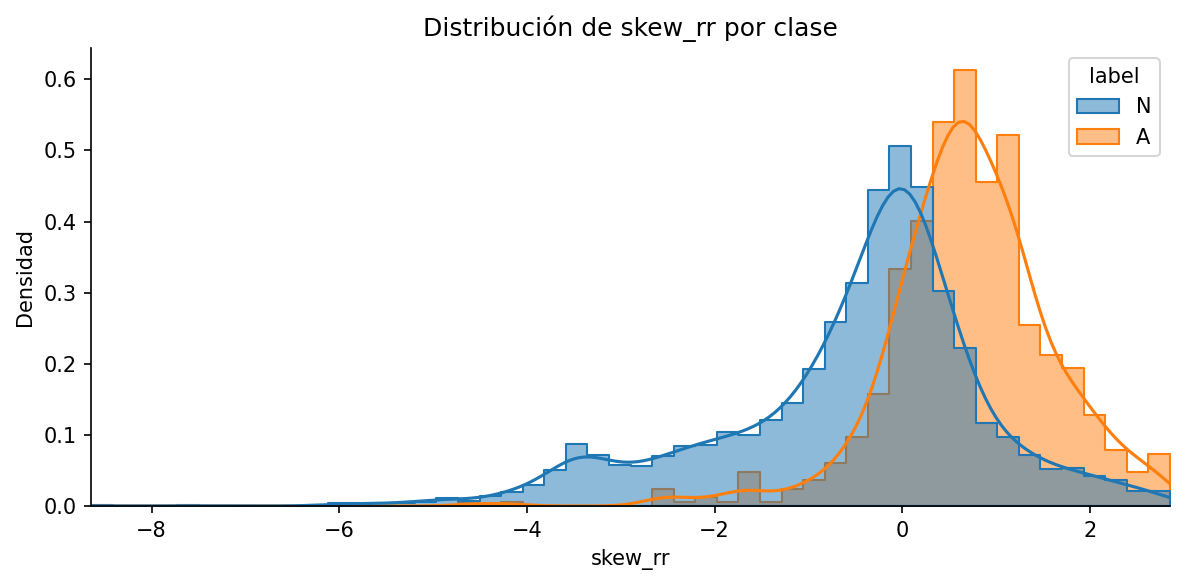

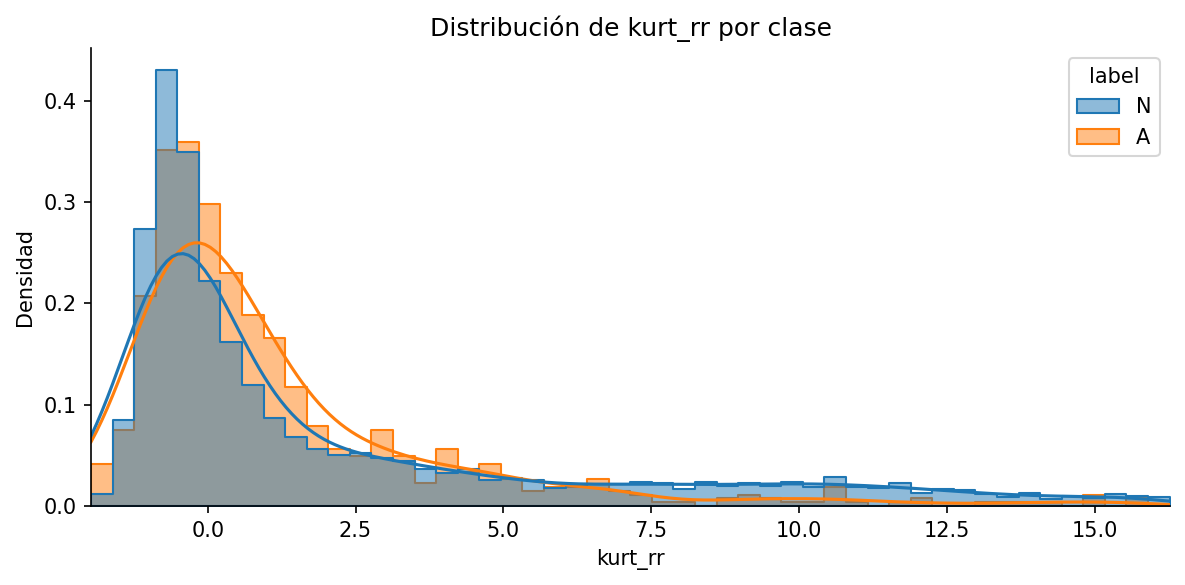

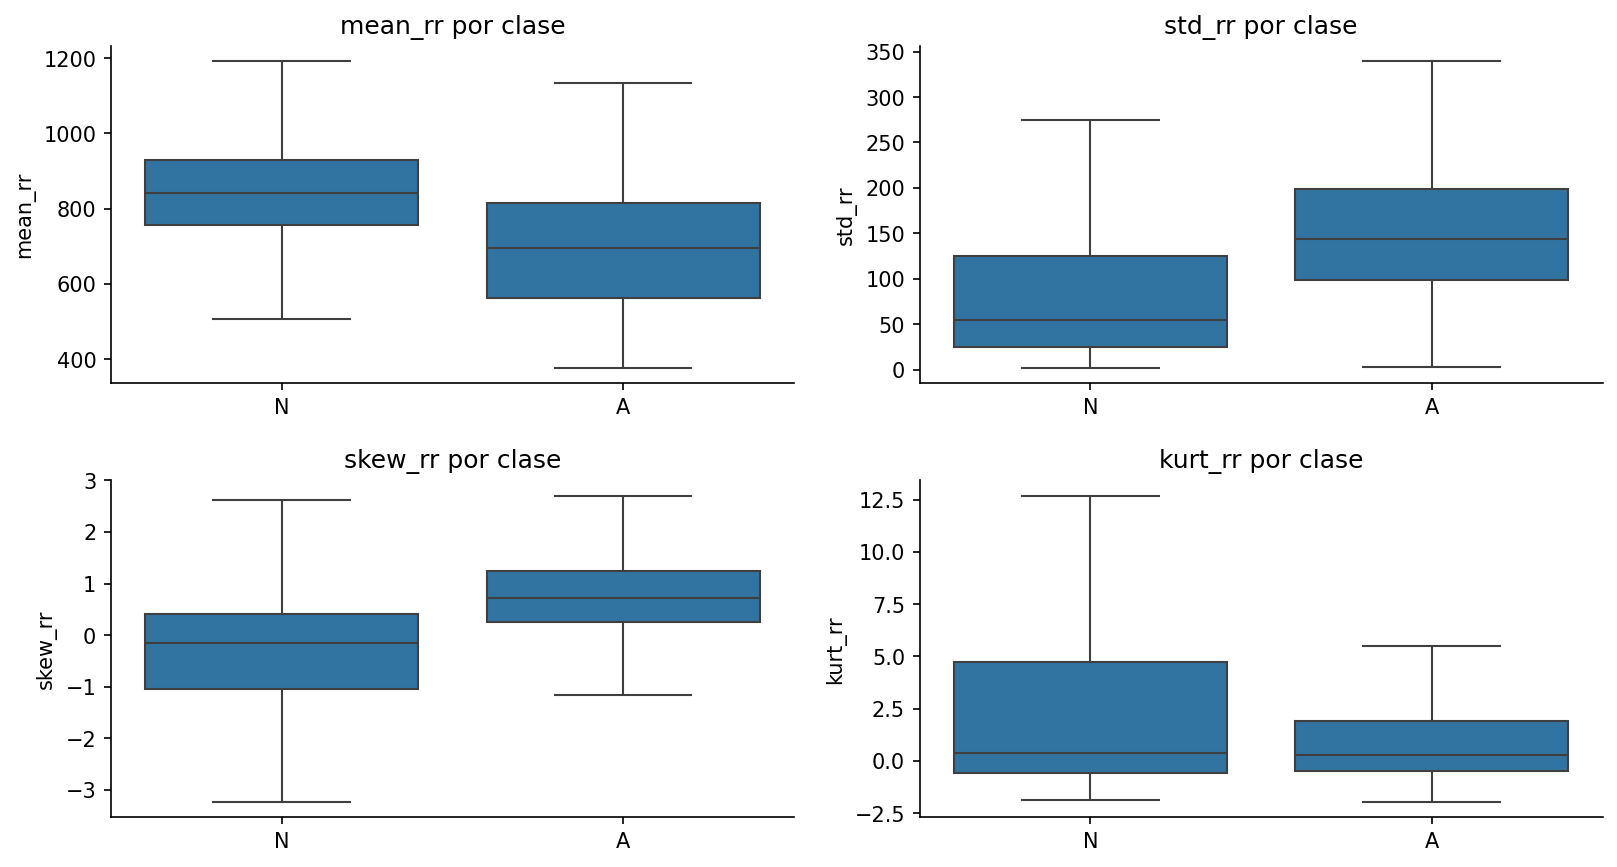

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar CSV
df = pd.read_csv('../data/ecg_rr_features_curado.csv')

# Separar clases
df_n = df[df['label'] == 'N']
df_af = df[df['label'] == 'A']

# Inspección general
print("Primeras filas del dataset completo:")
print(df.head())

print("\nDescripción estadística general:")
print(df.describe())

print("\nDistribución de clases:")
print(df['label'].value_counts())

print("\nTipos de datos:")
print(df.dtypes)

# Inspección por clase
print("\n==================== CLASE N ====================")
print("Primeras filas (N):")
print(df_n.head())

print("\nDescripción estadística (N):")
print(df_n.describe())

print("\nCantidad de muestras (N):", len(df_n))

print("\n==================== CLASE A ====================")
print("Primeras filas (A):")
print(df_af.head())

print("\nDescripción estadística (A):")
print(df_af.describe())

print("\nCantidad de muestras (A):", len(df_af))

# Variables a analizar
features = ['mean_rr', 'std_rr', 'skew_rr', 'kurt_rr']

# Gráficos de distribución 
for feature in features:
    plt.figure(figsize=(8, 4), dpi=150)

    # Recortar valores extremos
    upper_limit = df[feature].quantile(0.95) 
    df_plot = df[df[feature] <= upper_limit] 

    # hue para colorear de acuerdo a la clase, kde para dibujar una curva de densidad, bins para definir el número de barras
    # common_norm=False para que cada clase tenga su propia normalización, etc
    sns.histplot(
        data=df_plot, x=feature, hue='label', kde=True,
        stat='density', bins=50, element='step',
        common_norm=False, alpha=0.5
    )
    plt.title(f'Distribución de {feature} por clase')
    plt.xlabel(feature)
    plt.ylabel('Densidad')
    plt.xlim(df_plot[feature].min(), upper_limit) # Graficar desde el mínimo hasta el quantil definido
    sns.despine()
    plt.tight_layout()
    plt.show()

# Diagramas de caja
fig, axes = plt.subplots(2, 2, figsize=(11, 6), dpi=150)
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(data=df, x='label', y=feature, ax=axes[i], showfliers=False)
    axes[i].set_title(f'{feature} por clase')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(feature)
    sns.despine(ax=axes[i])

plt.tight_layout(pad=1.5)
plt.show()

### Análisis exploratorio del dataset

#### ¿Qué variables parecen diferenciar más entre clases?

Las variables que muestran mayor poder de discriminación entre ritmos normales (N) y fibrilación auricular (A) son:

- **mean_rr**: el promedio de los intervalos RR tiende a ser menor en los casos con AFib. Esto es coherente con el hecho de que la fibrilación auricular puede provocar latidos más rápidos e irregulares.
- **std_rr**: la desviación estándar es mucho mayor en los registros AFib, lo que refleja la alta variabilidad del ritmo cardiaco.

Estas dos variables muestran una clara separación estadística entre clases. Skewness y kurtosis tienen valores extremos pero con menor consistencia, lo cual limita su capacidad discriminativa confiable.

---

#### ¿Qué aspectos del dataset llaman la atención?

- **Desequilibrio de clases**: hay muchos más ejemplos de clase **Normal (N = 4822)** que de **AFib (A = 724)**. Esto puede afectar el entrenamiento del modelo si no se maneja adecuadamente (por ejemplo, con técnicas de balanceo o ponderación).
- **Alta dispersión en las variables**: particularmente en `std_rr`, `skew_rr` y `kurt_rr`, lo que indica presencia de valores extremos o comportamientos anómalos en ciertas señales.
- **Casos con valores extremos**: por ejemplo, hay registros con `std_rr` de más de 8,000 y `kurt_rr` de hasta 78, lo que sugiere outliers fuertes.
